In [1]:
import numpy as np
import matplotlib.pyplot as plt                 
import pandas as pd

####
age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

##### Can you accurately predict insurance costs?

In [24]:
df = pd.read_csv('insurance.csv')
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [25]:
df['sex'] = df['sex'].map({'female': 0,'male':1})
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [26]:
df['smoker'] = df['smoker'].map({'yes': 1,'no':0})


In [27]:
df['region'] = df['region'].map({'southeast': 1,'southwest':2,'northeast': 3,'northwest':4})


In [28]:
df


,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,2,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,4,21984.47061
4,32,1,28.880,0,0,4,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,1,1629.83350
1336,21,0,25.800,0,0,2,2007.94500


In [29]:
X = df.drop(['charges'],axis = 'columns')

X


,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,2
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,4
4,32,1,28.880,0,0,4
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,4
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,2


In [30]:
y = df['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

## check size of dataset

In [31]:
df.shape 

(1338, 7)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [33]:
from sklearn.model_selection import train_test_split

## Check statistics of dataset

In [34]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,2.455904,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.130888,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,3.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,4.000000,63770.428010


#### check memory requirement and no of rovs,colms,datatypes of all clms

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


#### check for null values

In [36]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state = 42)

In [38]:
y_train

560      9193.83850
1285     8534.67180
1142    27117.99378
969      8596.82780
486     12475.35130
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1070, dtype: float64

In [39]:
X_train

,age,sex,bmi,children,smoker,region
560,46,0,19.950,2,0,4
1285,47,0,24.320,0,0,3
1142,52,0,24.860,0,0,1
969,39,0,34.320,5,0,1
486,54,0,21.470,3,0,4
...,...,...,...,...,...,...
1095,18,0,31.350,4,0,3
1130,39,0,23.870,5,0,1
1294,58,1,25.175,0,0,3
860,37,0,47.600,2,1,2


In [40]:
reg = LinearRegression()


In [41]:
reg.fit(X_train,y_train)

LinearRegression()

In [42]:
svm = SVR()
svm.fit(X_train,y_train)


rf = RandomForestRegressor()
rf.fit(X_train,y_train)

gb = GradientBoostingRegressor()
gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [43]:
p1 = reg.predict(X_test)
p2 =  svm.predict(X_test)
p3 =  rf.predict(X_test)
p4 =  gb.predict(X_test)

In [44]:
d = pd.DataFrame({'Actual op': y_test,'Lr': p1,'SVM': p2,'RF': p3,'GB': p4}) 
d # choose your best modl based on this opts

,Actual op,Lr,SVM,RF,GB
764,9095.06825,8597.284895,9548.249984,11186.510197,10810.952230
887,5272.17580,7231.743882,9492.630738,5769.678245,5837.446283
890,29330.98315,37039.232090,9648.662039,28296.251079,27621.536382
1293,9301.89355,9616.212129,9555.070660,10822.504881,9924.440767
259,33750.29180,27161.155047,9420.628253,34882.357300,33517.594584
...,...,...,...,...,...
109,47055.53210,39017.518638,9648.805088,47142.020952,45901.005642
575,12222.89830,11922.482922,9625.363856,11976.458303,12306.163109
535,6067.12675,7316.166925,9504.121835,6105.796980,6577.338535
543,63770.42801,40853.403071,9604.970360,46691.424705,48308.211959


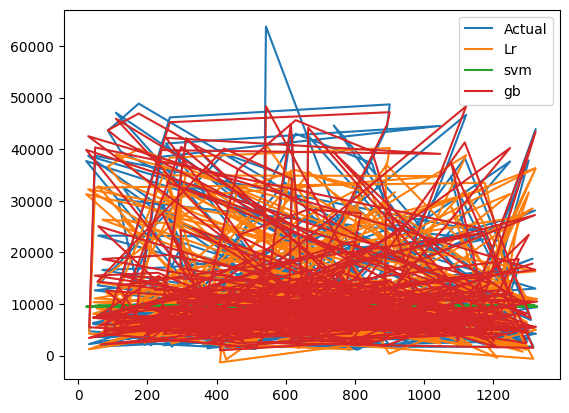

In [45]:
# comparing prformanc
plt.plot(d['Actual op'],label = 'Actual')
plt.plot(d['Lr'],label = 'Lr')
plt.plot(d['SVM'],label = 'svm')
plt.plot(d['GB'],label = 'gb')
plt.legend()





In [46]:
'''
 it is diffcult for us to compar so simplifying this
'''


'\n it is diffcult for us to compar so simplifying this\n'

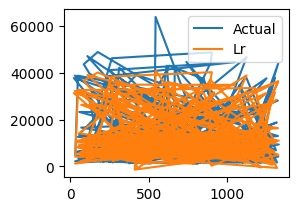

In [47]:
plt.subplot(221) 
plt.plot(d['Actual op'],label = 'Actual')
plt.plot(d['Lr'],label = 'Lr')
plt.legend()

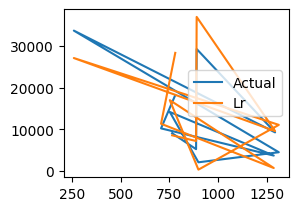

In [48]:
plt.subplot(221)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['Lr'].iloc[0:11],label = 'Lr')

'''
slct only 10 valus and compar thn 
'''
plt.legend()

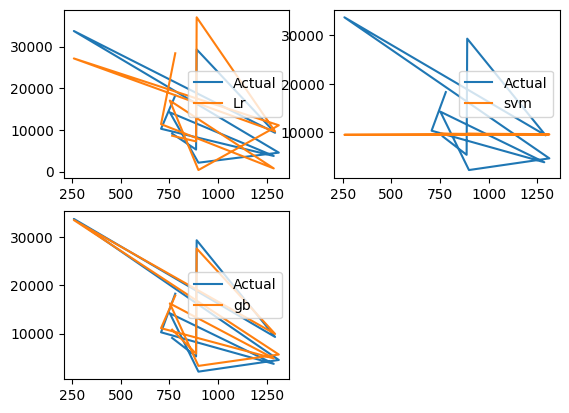

In [49]:
plt.subplot(221)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['Lr'].iloc[0:11],label = 'Lr')
plt.legend()

plt.subplot(222)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['SVM'].iloc[0:11],label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['GB'].iloc[0:11],label = 'gb')
plt.legend()

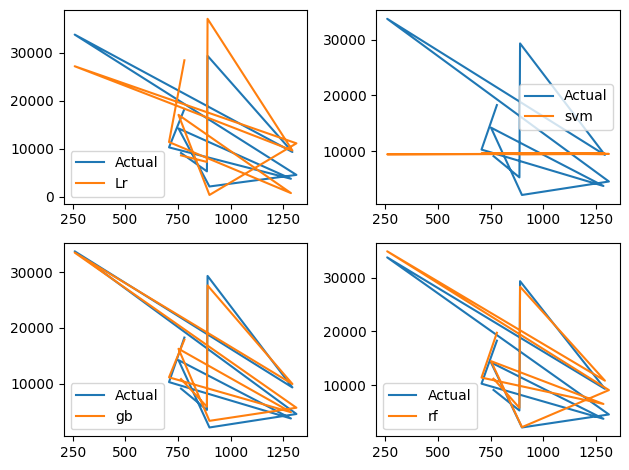

In [50]:
plt.subplot(221)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['Lr'].iloc[0:11],label = 'Lr')
plt.legend()

plt.subplot(224)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['RF'].iloc[0:11],label = 'rf')
plt.legend()

plt.subplot(222)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['SVM'].iloc[0:11],label = 'svm')
plt.legend()

plt.subplot(223)
plt.plot(d['Actual op'].iloc[0:11],label = 'Actual')
plt.plot(d['GB'].iloc[0:11],label = 'gb')
plt.legend()

plt.tight_layout() # no ovrlaping 

# obsrv that gb is th bst modl

In [51]:
# evaluating based on r2_score

from sklearn import metrics
metrics.r2_score(y_test,p1) # comp for linar rgrssion

0.7830215871623442

In [54]:
metrics.r2_score(y_test,p2) # comp for svm

-0.07229744354540268

In [55]:
metrics.r2_score(y_test,p3) # comp for rf

0.8632274213193665

In [56]:
metrics.r2_score(y_test,p4) # comp for gb
# gb is bttr

0.8798261713029993

In [57]:
# mean absolute error for choosing best model

In [58]:
metrics.mean_absolute_error(y_test,p1) # comp for linar rgrssion

4190.220190137916

In [59]:
metrics.mean_absolute_error(y_test,p2) # comp for svm

8592.45133090515

In [60]:
metrics.mean_absolute_error(y_test,p3) # comp for rf

2538.3070835639614

In [61]:
metrics.mean_absolute_error(y_test,p4) # comp for gb less error so best

2402.6776959562403

In [62]:
# predict charges for a nev customer
data = {
    'age': 40, 'sex': 1,'bmi':40.30,'children':1,'smoker':1,'region':2
}

In [63]:
data

{'age': 40, 'sex': 1, 'bmi': 40.3, 'children': 1, 'smoker': 1, 'region': 2}

In [64]:
d1 = pd.DataFrame(data,index=[0])

In [65]:
d1

,age,sex,bmi,children,smoker,region
0,40,1,40.3,1,1,2


In [66]:
gb.predict(d1) # nevv customer

array([42871.21036709])

In [67]:
# Novv deploy the model...You need to test for entire dataset b4 deploying

gb = GradientBoostingRegressor()
gb.fit(X,y)

GradientBoostingRegressor()

In [68]:
import joblib
joblib.dump(gb,'mod_job')

['mod_job']

In [69]:
g = joblib.load('mod_job')

In [70]:
g.predict(d1) # more accurate bcos trained over entire dataset

array([42044.00621755])

In [71]:
from tkinter import *
def sho():
    a1  = float(p1.get())
    a2  = float(p2.get())
    a3  = float(p3.get())
    a4  = float(p4.get())
    a5  = float(p5.get())
    a6  = float(p6.get())

    model = joblib.load('mod_job')
    r = model.predict([[a1,a2,a3,a4,a5,a6]])
    Label(k,text = 'Cost').grid(row= 7)
    Label(k,text = r).grid(row= 8)
    print('cost: ',r)




k = Tk()
k.title("Insurance Cost Prediction")
label  = Label(k,text = "Prediction",bg = "black",fg = 'white').grid(row = 0,columnspan= 2)

Label(k,text = "enter age").grid(row =1 )
Label(k,text = "enter gender Female: 0 Male: 1").grid(row =2 )
Label(k,text = "enter bmi").grid(row =3)
Label(k,text = "enter no of childrn").grid(row =4 )
Label(k,text = "enter smokr: y:1 n:0").grid(row =5 )
Label(k,text = "enter rigion 1 to 4 ").grid(row =6 )

p1 = Entry(k)
p2 = Entry(k)
p3 = Entry(k)
p4 = Entry(k)
p5 = Entry(k)
p6 = Entry(k)

p1.grid(row =1,column = 1)
p2.grid(row =2,column = 1)
p3.grid(row =3,column = 1)
p4.grid(row =4,column = 1)
p5.grid(row =5,column = 1)
p6.grid(row =6,column = 1)

Button(k,text = "Click to predict",command = sho).grid()
mainloop()


C:\Users\benar\pyenv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


cost:  [62905.36342516]
